<center><h2><b>CIC-Darknet2020</b></h2></center>
<center><h2><b>Characterization models</b></h2></center>

# Libraries importing and configuration

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from darknet.classification import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
random_state = 42
dataset_folder = "dataset/" 
img_folder = "imgs/"

np.random.seed(random_state)
plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams["savefig.format"] = 'pdf'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 18})

In [3]:
samples = pd.read_csv(dataset_folder + "darknet_dataset_processed_encoded.csv")
samples = samples[samples['Label'] == 'Darknet']
del samples['Label']
samples.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
117170,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.683488e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117171,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.558961e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117172,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.301057e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117173,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,5.227810e+05,1.456330e+15,1.456330e+15,Audio-Streaming
117174,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,1.052330e+05,1.456330e+15,1.456330e+15,Audio-Streaming


# Darknet characterization

In [28]:
X, y, labels = split_train_target(samples, "Label.1")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
columns = samples.columns.tolist()

metrics = ["Precision", "Recall", "F1-score"]
display = ["Precisão", "Recall", "F-Score"]
models = ["Decision tree", "Random forest", "Multilayer perceptron"]

## Decision tree

100%|██████████| 10/10 [00:07<00:00,  1.43it/s, Test acc. #9=0.986]


               precision       recall       f1-score       support       
Audio-Streaming:  99.51		99.67		99.59		89080.00		
Browsing:         91.77		90.74		91.15		1960.00		
Chat:             99.06		99.19		99.12		30710.00		
Email:            94.11		94.39		94.14		3920.00		
File-Transfer:    97.92		97.84		97.87		16690.00		
P2P:              97.18		94.62		95.61		1300.00		
VOIP:             98.00		97.29		97.63		9950.00		
Video-Streaming:  97.18		96.33		96.74		9270.00		


 10-fold Accuracy: 98.78%
Test accuracy: 99.00%


Confusion matrix:
[[4368    4    2    0    0    0    2    0]
 [   3   61    1    0    0    1    1    0]
 [   8    3 1457    0    2    0    0    0]
 [   1    0    0  179   10    0    0    0]
 [   2    2    1    5  927    0    0    4]
 [   0    0    0    0    0   90    0    0]
 [   0    1    0    0    0    0  459   10]
 [   0    0    0    0    3    1   13  402]]

Audio-Streaming :   99.68%
Browsing :          85.92%
Chat :              99.73%
Email :             97.28%
File-Tr

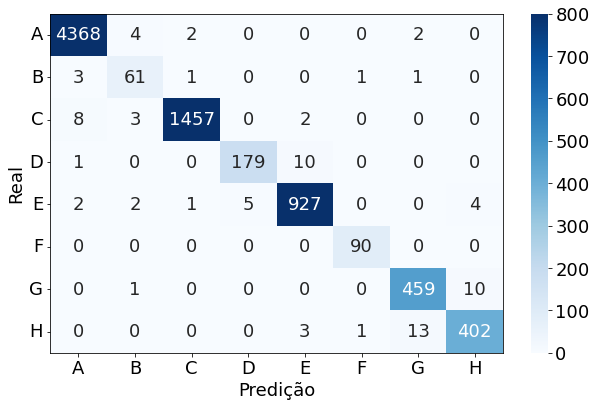

In [20]:
dt = DecisionTreeClassifier()
report_dt, accs_dt = evaluate_model(dt, X_train, y_train, X_test, y_test, labels, vmax=800,
                           rotation=(0,0), fname="imgs/dt_conf_app", display_labels=["A", "B", "C", "D", "E","F","G","H"], 
                           figsize=(9,6))

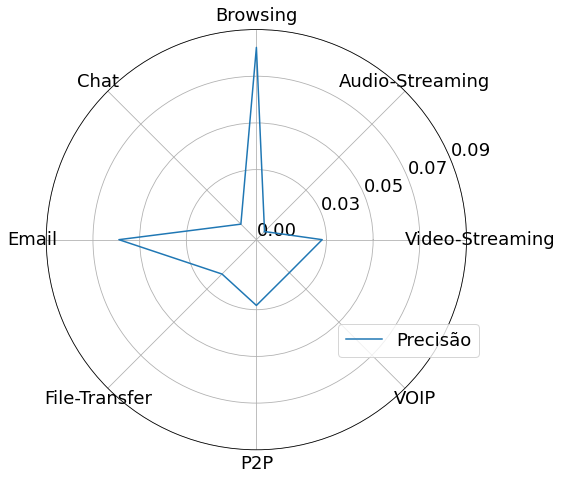

In [21]:
metrics_polar_plot(report_dt, labels, metrics, display, figsize=(8,8), 
                   fname="imgs/comparativo_medidas_dt", bbox_to_anchor=(1.35, 0.2, -0.3, 0.5))

## Random forest

100%|██████████| 10/10 [00:29<00:00,  3.00s/it, Test acc. #9=0.985]


               precision       recall       f1-score       support       
Audio-Streaming:  99.46		99.15		99.30		89080.00		
Browsing:         87.71		85.13		86.05		1960.00		
Chat:             98.54		98.99		98.77		30710.00		
Email:            98.02		97.44		97.67		3920.00		
File-Transfer:    97.49		97.48		97.48		16690.00		
P2P:              96.40		90.77		93.06		1300.00		
VOIP:             96.95		95.97		96.45		9950.00		
Video-Streaming:  92.39		96.12		94.19		9270.00		


 10-fold Accuracy: 98.31%
Test accuracy: 98.47%


Confusion matrix:
[[4336    7    6    0    3    2    0   22]
 [   3   57    0    0    0    1    4    2]
 [   3    3 1453    1    4    0    0    6]
 [   0    0    2  186    2    0    0    0]
 [   4    1    4    4  923    0    2    3]
 [   1    2    0    0    0   87    0    0]
 [   1    0    0    0    1    0  458   10]
 [   1    3    0    0    5    0   10  400]]

Audio-Streaming :   99.70%
Browsing :          78.08%
Chat :              99.18%
Email :             97.38%
File-Tr

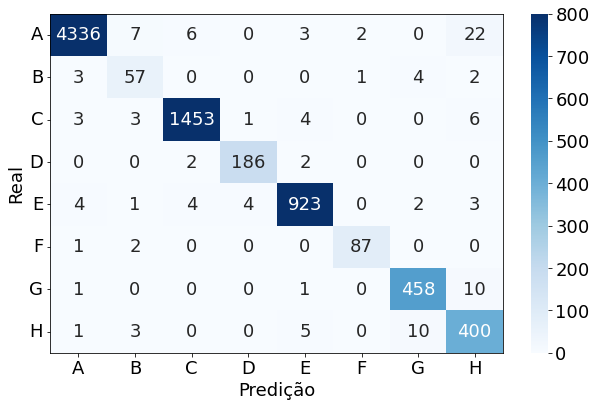

In [22]:
rf = RandomForestClassifier()
report_rf, accs_rf = evaluate_model(rf, X_train, y_train, X_test, y_test, labels, 
                         figsize=(9,6), rotation=(0,0), fname="imgs/rf_conf_app",
                        display_labels=["A", "B", "C", "D", "E","F","G","H"], vmax=800)

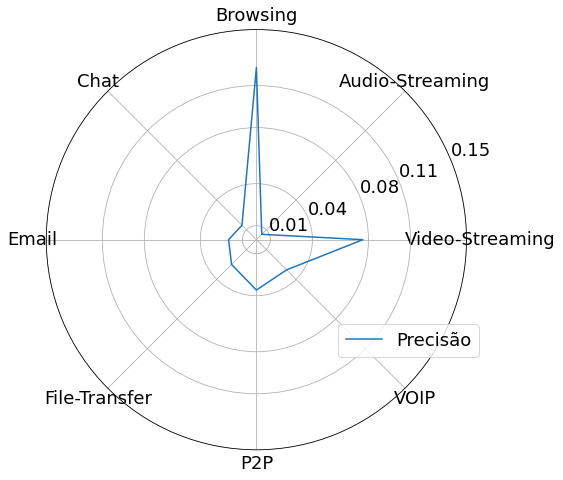

In [23]:
metrics_polar_plot(report_rf, labels, metrics, display, figsize=(8,8), 
                   fname="imgs/comparativo_medidas_rf", bbox_to_anchor=(1.35, 0.2, -0.3, 0.5))

## Multilayer perceptron

In [38]:
scaler = MinMaxScaler(feature_range = (-1,1)) # StandardScaler
scaler.fit(X)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

100%|██████████| 10/10 [05:29<00:00, 32.98s/it, Test acc. #9=0.967]


               precision       recall       f1-score       support       
Audio-Streaming:  99.32		98.92		99.12		89570.00		
Browsing:         74.52		73.73		73.67		1740.00		
Chat:             98.96		98.30		98.63		29970.00		
Email:            90.88		84.30		86.51		3810.00		
File-Transfer:    95.21		95.36		95.24		17660.00		
P2P:              88.09		87.75		87.61		1370.00		
VOIP:             93.36		95.71		94.48		9780.00		
Video-Streaming:  89.16		93.99		91.46		8980.00		


 10-fold Accuracy: 97.24%
Test accuracy: 96.75%


Confusion matrix:
[[4237   12   16    2   17    0    5   38]
 [   7   67    3    0    1    1    9    1]
 [   7    2 1521    2    5    0    6    1]
 [   0    0    1  195    5    0    0    0]
 [   2    8    0   19  782    3    4   26]
 [   6    6    0    0    0   71    0    0]
 [   2    2    0    0    1    0  463   19]
 [   0    0    2    0    0    0   20  426]]

Audio-Streaming :   99.44%
Browsing :          69.07%
Chat :              98.57%
Email :             89.45%
File-Tr

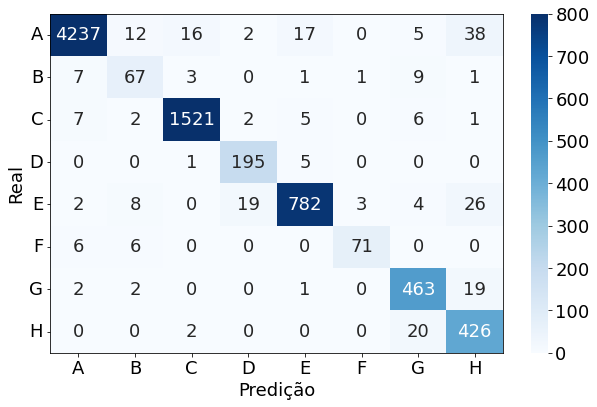

In [39]:
mlp = MLPClassifier(hidden_layer_sizes=[20, 40, 20], learning_rate="adaptive", early_stopping=True)
report_mlp, accs_mlp = evaluate_model(mlp, scaled_X_train, y_train, scaled_X_test, y_test, labels, vmax=800,
                           rotation=(0,0), fname="imgs/mlp_conf_app", display_labels=["A", "B", "C", "D", "E","F","G","H"], 
                           figsize=(9,6))

## Models accuracy comparison

In [46]:
accs = {models[0]: accs_dt, models[1]: accs_rf, models[2]: accs_mlp}
accs

{'Decision tree': {'Audio-Streaming': 99.68051118210862,
  'Browsing': 85.91549295774648,
  'Chat': 99.7262149212868,
  'Email': 97.28260869565217,
  'File-Transfer': 98.40764331210191,
  'P2P': 97.82608695652173,
  'VOIP': 96.63157894736842,
  'Video-Streaming': 96.63461538461539},
 'Random forest': {'Audio-Streaming': 99.70108070820879,
  'Browsing': 78.08219178082192,
  'Chat': 99.18088737201364,
  'Email': 97.38219895287958,
  'File-Transfer': 98.40085287846482,
  'P2P': 96.66666666666667,
  'VOIP': 96.62447257383965,
  'Video-Streaming': 90.29345372460497},
 'Multilayer perceptron': {'Audio-Streaming': 99.43675193616522,
  'Browsing': 69.0721649484536,
  'Chat': 98.57420609202852,
  'Email': 89.44954128440367,
  'File-Transfer': 96.42416769420468,
  'P2P': 94.66666666666667,
  'VOIP': 91.3214990138067,
  'Video-Streaming': 83.36594911937377}}

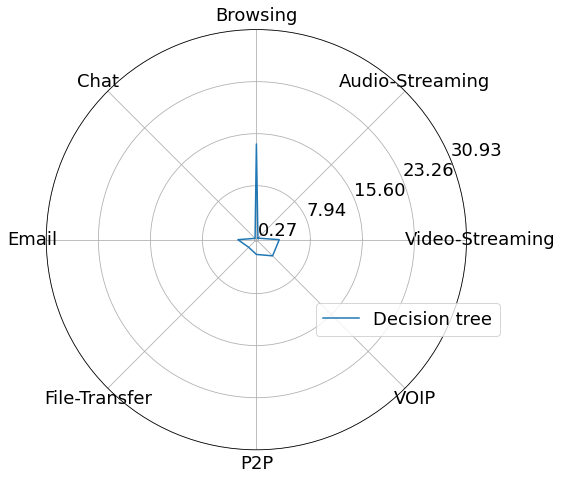

In [47]:
accuracy_polar_plot(accs, labels, models, figsize=(8,8), 
                    bbox_to_anchor=(1, 0.25, 0.1,4), fname='imgs/comparativo_acc')

In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import *

In [36]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_dt = cross_val_score(dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=10)
print("Decision tree mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_dt)*100, np.std(scores_dt)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:   38.5s remaining:    5.2s


Decision tree mean accuracy: 99.154% (0.173)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.0s finished


In [40]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=10)
print("Random forest mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_rf)*100, np.std(scores_rf)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  1.4min remaining:   11.5s


Random forest mean accuracy: 98.754% (0.221)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


In [41]:
scaler = MinMaxScaler(feature_range = (-1,1)) # StandardScaler
scaler.fit(X)
scaled_X = scaler.transform(X)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_mlp = cross_val_score(mlp, scaled_X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=10)
print("Multilayer perceptron mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_mlp)*100, np.std(scores_mlp)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  3.4min remaining:   27.6s


Multilayer perceptron mean accuracy: 97.731% (0.471)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished


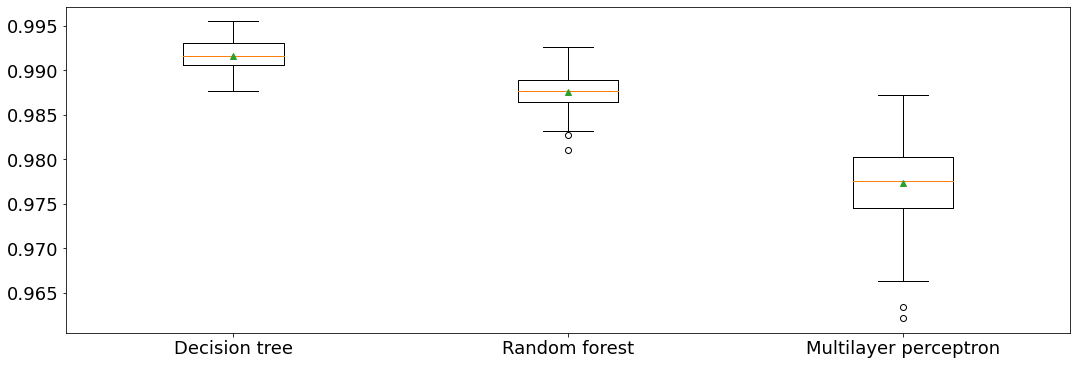

In [42]:
plt.boxplot([scores_dt, scores_rf, scores_mlp], labels=['Decision tree', 'Random forest', "Multilayer perceptron"], showmeans=True)
plt.show()

In [43]:
t, p = paired_ttest_5x2cv(estimator1=dt, estimator2=rf, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 3.809
p value: 0.013
Difference between mean performance is probably real


In [48]:
t, p = paired_ttest_5x2cv(estimator1=dt, estimator2=mlp, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 16.660
p value: 0.000
Difference between mean performance is probably real


In [45]:
t, p = paired_ttest_5x2cv(estimator1=rf, estimator2=mlp, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 6.312
p value: 0.001
Difference between mean performance is probably real
